### Importación de Librerías

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import ipywidgets as widgets
import warnings

from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")
plt.style.use('ggplot')
px.defaults.template = "ggplot2"
pd.set_option('display.max_columns', None)

### Leer el Dataframe

In [2]:
# Obtención de la ruta
actual_dir = os.getcwd()
ext_dir = os.path.dirname(actual_dir)
subdir = '/descarga/data/Municipios/Municipios_Clean/'
dir = ext_dir + subdir

In [3]:
df = pd.read_csv(dir + 'Data_Climatic_Municipios_Clean.csv', low_memory=False)
df.sort_values(by=['Año','Mes','Día','Estado_CVE', 'Municipio_CVE'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Estado,Municipio,Estado_CVE,Municipio_CVE,Año,Mes,Día,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
0,Aguascalientes,Aguascalientes,1,1,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
1,Aguascalientes,Asientos,1,2,2020,1,1,12.91,23.01,6.02,12.88,19.87,7.19,7.03,9.95,78.76,5.12,69.81,13.81
2,Aguascalientes,Calvillo,1,3,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
3,Aguascalientes,Cosío,1,4,2020,1,1,12.03,21.56,5.61,11.83,18.49,6.46,6.87,9.36,77.65,6.20,73.94,9.15
4,Aguascalientes,Jesús María,1,5,2020,1,1,13.37,22.76,6.50,13.30,20.08,7.35,7.12,10.21,79.30,3.91,68.44,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441195,Zacatecas,Villa Hidalgo,32,54,2023,10,31,15.41,26.25,8.85,13.67,20.40,8.55,9.00,11.33,79.10,2.77,75.62,1.87
3441196,Zacatecas,Villanueva,32,55,2023,10,31,17.53,29.22,9.80,16.14,22.72,9.83,10.43,13.28,79.32,2.34,71.25,3.85
3441197,Zacatecas,Zacatecas,32,56,2023,10,31,16.23,27.09,9.41,14.58,21.00,9.33,9.26,11.92,78.10,2.77,72.56,4.25
3441198,Zacatecas,Trancoso,32,57,2023,10,31,15.38,25.62,8.01,13.65,19.69,7.90,8.38,11.02,79.13,3.32,72.31,1.38


### Creacion de DataFrame a nivel Estatal inferido de los datos municipales 

De acuerdo a las necesidades del cliente, el equipo llego a la conclusion de que la mejor manera de trabajar con los datos climaticos es a nivel estatal, por lo que se creo un DataFrame a nivel estatal con los datos de los municipios.

In [4]:
### Crea Dataframe Estatal inferido a partir del Municipal
df_estatal = df.groupby(['Año','Mes','Estado', 'Estado_CVE']).mean().reset_index()
df_estatal.drop(columns=['Municipio_CVE','Día'], inplace=True)
df_estatal

,Año,Mes,Estado,Estado_CVE,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
0,2020,1,Aguascalientes,1,11.871672,24.617947,3.252815,11.622434,19.955865,4.849208,2.336100,6.980059,79.269296,2.306334,59.219238,0.836100
1,2020,1,Baja California,2,11.503548,21.848387,5.296516,12.156581,19.138839,7.561161,3.232000,7.694516,96.414323,2.328968,60.059871,0.225097
2,2020,1,Baja California Sur,3,18.086452,27.860968,12.222968,17.575806,24.043097,13.045290,10.594581,14.085290,99.619742,2.680968,67.542323,0.050258
3,2020,1,Campeche,4,24.531466,30.339472,20.069032,24.493050,30.125425,19.977243,18.949589,21.721496,100.730762,0.696833,73.750880,1.040616
4,2020,1,Chiapas,7,20.458480,27.968901,15.246714,20.349943,26.273483,15.924568,16.362354,18.356055,91.695314,1.527048,80.520960,1.351758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2023,10,Tamaulipas,28,25.542873,35.266069,19.147674,24.547022,30.963188,19.681215,17.522588,21.035079,96.205454,2.576077,68.954276,2.814044
1468,2023,10,Tlaxcala,29,15.290113,23.650790,9.515000,14.971597,20.815581,10.438403,11.728065,13.349629,76.623823,1.711016,83.134355,10.307129
1469,2023,10,Veracruz,30,24.580210,31.172556,20.226730,24.134035,28.654913,20.827220,20.242191,22.187728,93.911541,2.264079,80.661794,8.900584
1470,2023,10,Yucatán,31,27.839565,32.797638,24.157495,27.691656,32.443996,24.111659,23.106765,25.399595,100.892797,0.607775,78.530797,2.573174


In [5]:
df_estatal.to_csv(ext_dir + '/descarga/data/Estados/' + 'Data_Climatic_Estatal_Inferido_Clean.csv', index=False)

### Descripcion solo de las variables numericas

In [6]:
columnas_numericas = ['Temp_Superficial','Temp_Superficial_MAX','Temp_Superficial_MIN','Temp_2_Metros','Temp_2_Metros_MAX','Temp_2_Metros_MIN','Temp_2_Metros_Pto_Congelación','Temp_2_Metros_Pto_Húmedo','Presión_Superficial','Velocidad_Viento','Humedad_Relativa','Precipitacion']
df_estatal[columnas_numericas].describe()

,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,22.013029,32.859709,14.363630,21.124783,28.166155,15.455790,11.776865,16.450818,88.734345,1.847348,62.334582,2.580671
std,5.073739,5.209239,6.225044,4.753899,4.184188,5.586824,7.225245,5.604649,7.800812,0.611161,15.394474,3.276291
min,7.305806,18.892065,-1.774579,7.814299,16.196774,0.802412,-9.865272,0.272277,75.433460,0.411409,20.651204,0.000000
25%,18.519838,29.085022,9.695081,17.776948,25.245562,11.191272,6.314761,12.428520,82.348073,1.418371,50.891138,0.269087
50%,22.347306,31.934887,14.125348,21.191541,28.139136,15.241894,12.027976,16.527848,89.302300,1.815252,62.217004,1.225591
75%,25.818232,36.784256,19.421538,24.674445,31.068161,19.970326,17.346413,21.196055,94.741315,2.275370,75.236117,3.886939
max,33.525097,46.667226,26.960485,31.925758,39.203212,27.030588,25.926727,27.158328,101.463470,3.633549,92.658999,28.186566


In [7]:
df_estatal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Año                            1472 non-null   int64  
 1   Mes                            1472 non-null   int64  
 2   Estado                         1472 non-null   object 
 3   Estado_CVE                     1472 non-null   int64  
 4   Temp_Superficial               1472 non-null   float64
 5   Temp_Superficial_MAX           1472 non-null   float64
 6   Temp_Superficial_MIN           1472 non-null   float64
 7   Temp_2_Metros                  1472 non-null   float64
 8   Temp_2_Metros_MAX              1472 non-null   float64
 9   Temp_2_Metros_MIN              1472 non-null   float64
 10  Temp_2_Metros_Pto_Congelación  1472 non-null   float64
 11  Temp_2_Metros_Pto_Húmedo       1472 non-null   float64
 12  Presión_Superficial            1472 non-null   f

### Plot por Variable/Año/Meses para cada estado
Añadimos un wiget para poder seleccionar la variable que se desea visualizar ya que plotly tiene dificultad a la hora de mostrar mas varios graficos a la vez.

In [8]:
def plotting_plotly(Variable):    
    fig = px.line(df_estatal, x='Mes', y=Variable, color='Estado', facet_col='Año',
                labels={'Mes': 'Meses'}
                )

    # Ajustar las características del gráfico
    fig.update_layout(height=500, width=2100, title_x=0.5)
    fig.update_xaxes(tickangle=45, tickmode='array', tickvals=[1,2,3,4,5,6,7,8,9,10,11,12], ticktext=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    fig.show()

widgets.interact(plotting_plotly, Variable=columnas_numericas)

interactive(children=(Dropdown(description='Variable', options=('Temp_Superficial', 'Temp_Superficial_MAX', 'T…

<function __main__.plotting_plotly(Variable)>

# Outliers

### Bloxplot por Variable

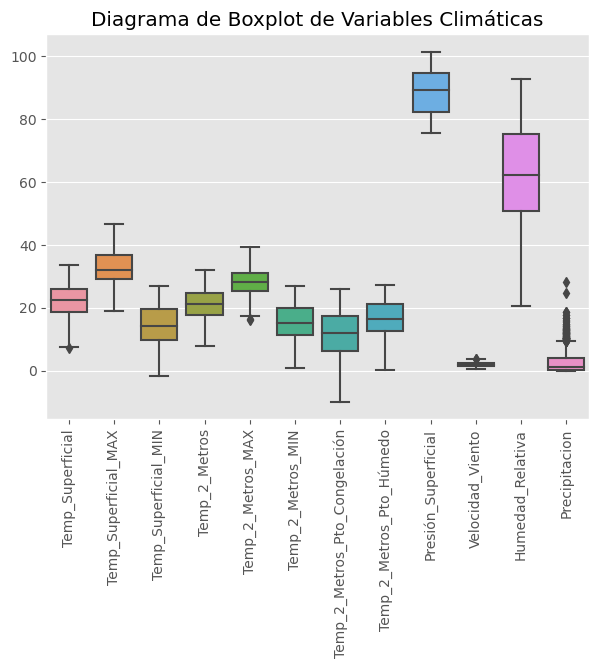

In [9]:
plt.figure(figsize=(7, 5))
#colores = sns.color_palette("husl", len(columnas_numericas))
sns.boxplot(data=df_estatal[columnas_numericas])
plt.title('Diagrama de Boxplot de Variables Climáticas')
plt.xticks(rotation=90)  # Rotamos las etiquetas del eje x para una mejor visualización
plt.show()

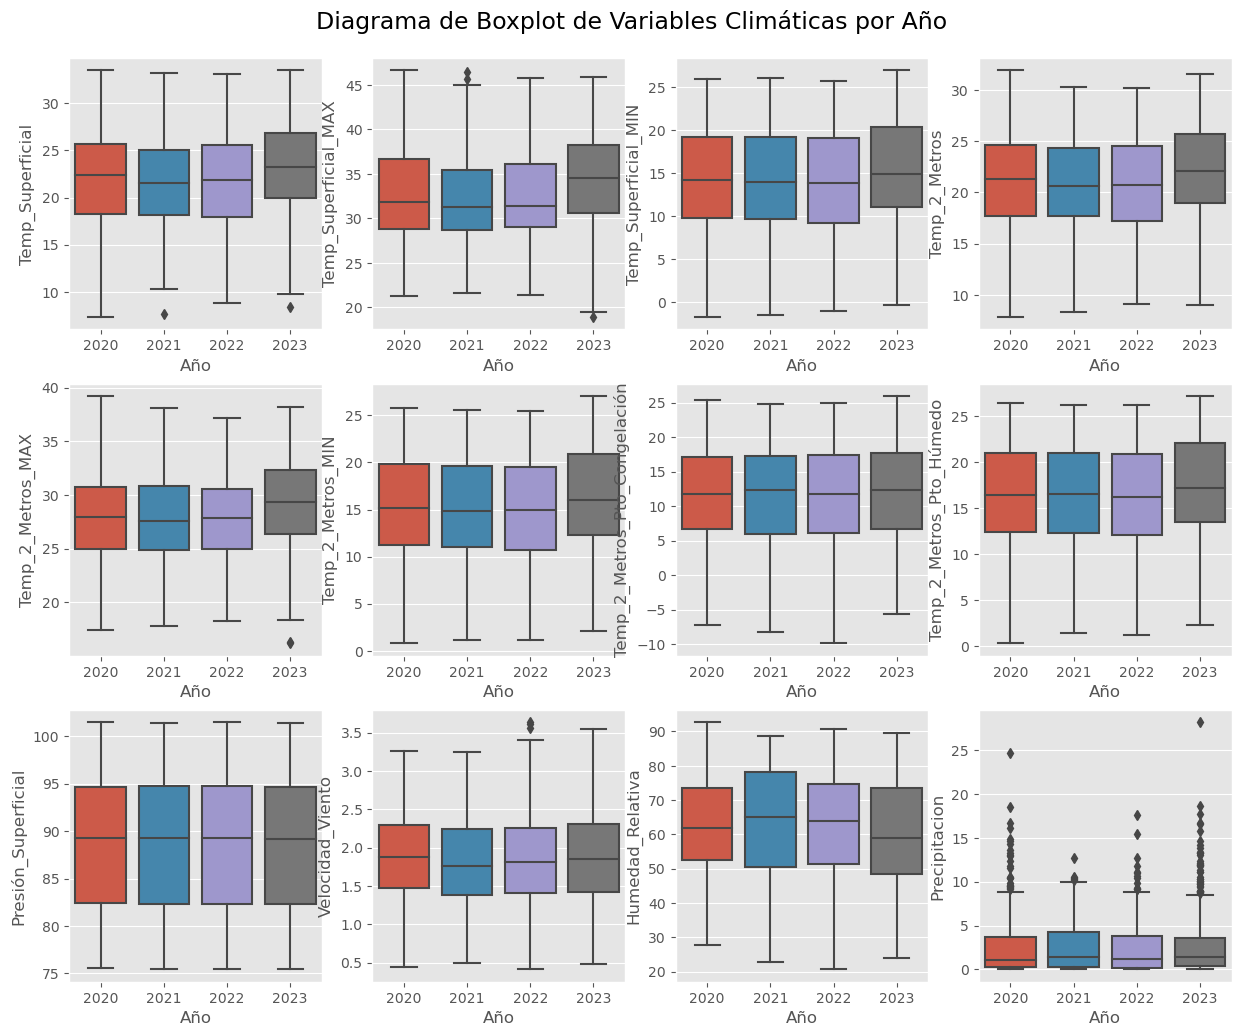

In [10]:
# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
fig.subplots_adjust(hspace=0.2)  # Ajustar el espaciado vertical entre subplots

# Iterar a través de las columnas numéricas y crear un boxplot para cada una en relación con el año
for i, column in enumerate(columnas_numericas):
    row = i // 4  # Calcular la fila para ubicar el subplot
    col = i % 4  # Calcular la columna para ubicar el subplot (de 0 a 3)
    sns.boxplot(data=df_estatal, x='Año', y=column, ax=axes[row, col])  # Crear el boxplot en el subplot correspondiente
    axes[row, col].set_ylabel(column)  # Establecer el nombre de la variable en el eje y del subplot

plt.suptitle('Diagrama de Boxplot de Variables Climáticas por Año',fontsize=17, y=0.92)
plt.show()  # Mostrar los subplots

### Histograma por Variable

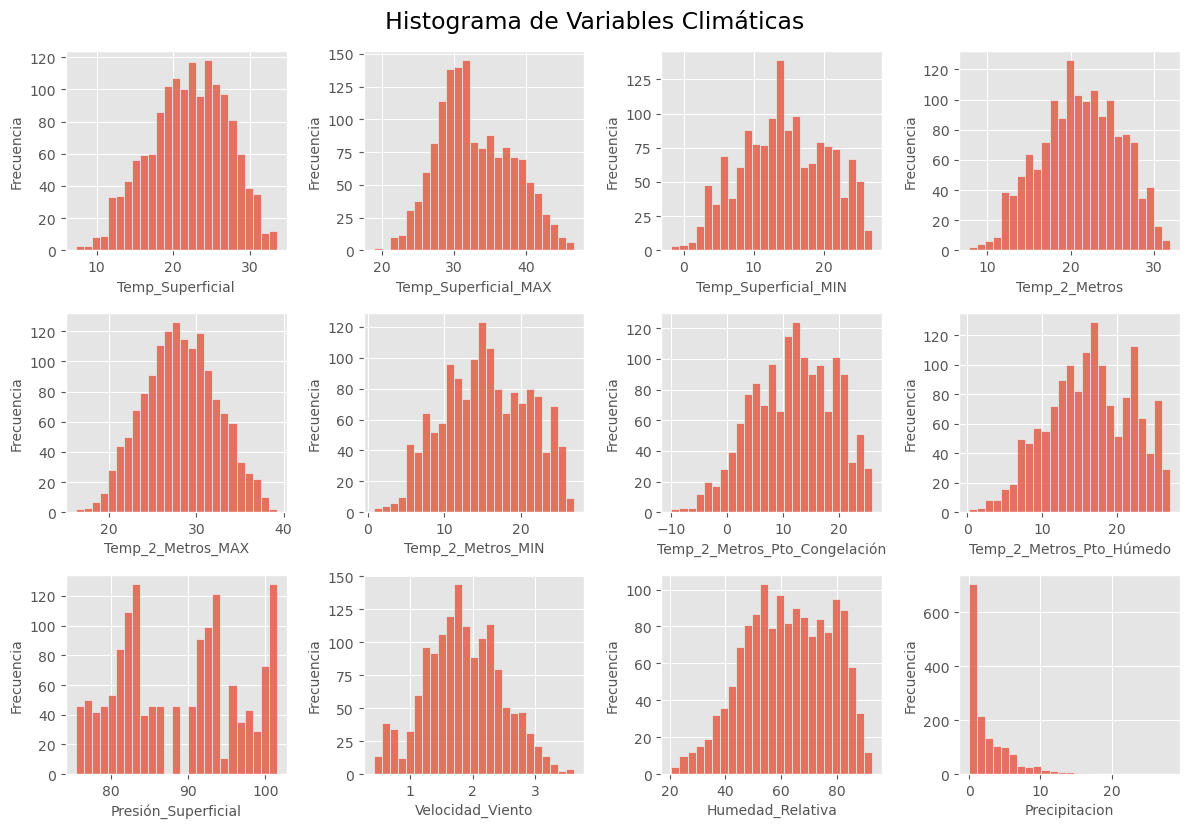

In [11]:
plt.figure(figsize=(12, 8))

# Crear histogramas con colores diferentes para cada variable
for i, columna in enumerate(columnas_numericas):
    plt.subplot(3, 4, i + 1)  # Ajustar la disposición de los subplots según el número de columnas
    sns.histplot(df_estatal[columna], bins=25)
    plt.xlabel(columna, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)


plt.tight_layout()
plt.suptitle('Histograma de Variables Climáticas',fontsize=17, y=1.03)
plt.show()

En el análisis de las variables climáticas se observa que la mayoría de las variables no muestran valores atípicos significativos, lo que sugiere una distribución relativamente homogénea en sus registros. Sin embargo, se destaca que la variable de precipitación presenta valores atípicos, lo cual puede estar relacionado con la ocurrencia de eventos meteorológicos extremos.

Estos valores atípicos en la precipitación pueden ser indicativos de eventos climáticos inusuales, como huracanes, tormentas locales severas o cualquier otra forma de precipitación extrema. Estos eventos pueden ser de gran relevancia para el análisis, ya que no siguen el patrón esperado y podrían influir significativamente en el estudio de las condiciones climáticas.

In [12]:
clf = LocalOutlierFactor(n_neighbors=20)
X = df_estatal[columnas_numericas]
estimado_LOF = clf.fit_predict(X)
df_clean = df_estatal[columnas_numericas][~(estimado_LOF==-1)]
print(f"Cantidad de outliers: {abs(estimado_LOF[estimado_LOF==-1].sum())}")

Cantidad de outliers: 11


Luego de limpiar los valores atípicos del dataframe se observa que la distribución de los datos es más homogénea y se ajusta mejor a la distribución normal.

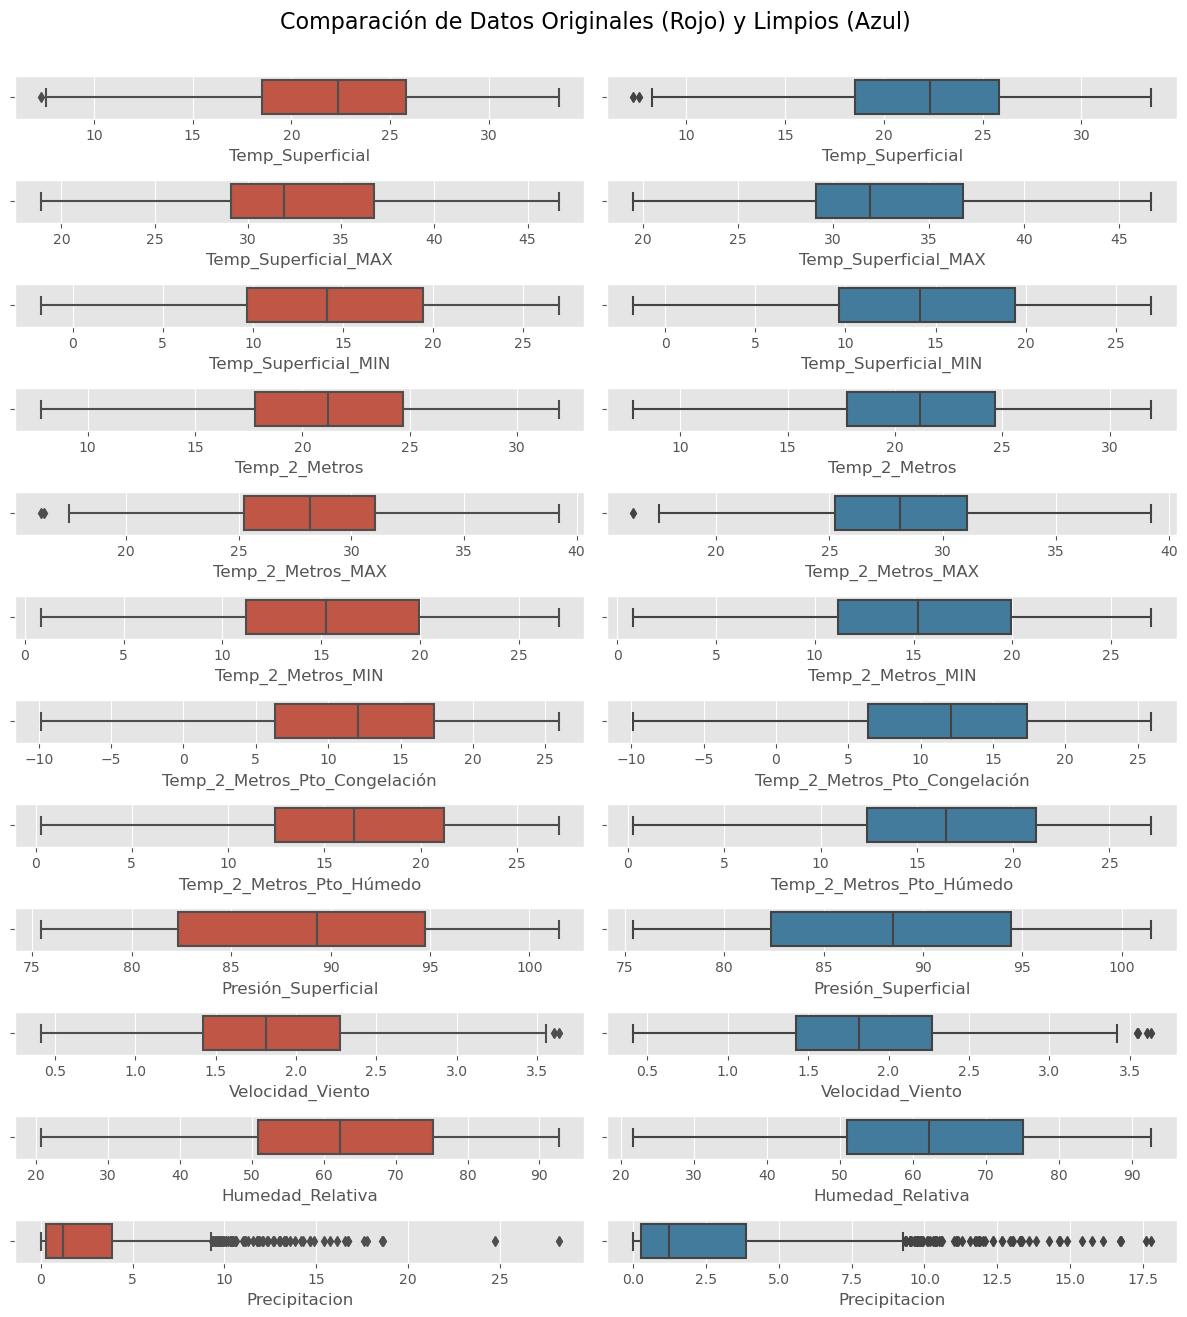

In [13]:
n_plots = len(columnas_numericas)
fig, axes = plt.subplots(n_plots, 2, figsize=(12, 13))
for i, column in enumerate(columnas_numericas):
    sns.boxplot(x=df_estatal[columnas_numericas][column], ax=axes[i, 0], color='#d34732')
    sns.boxplot(x=df_clean[column], ax=axes[i, 1], color='#347fab')

plt.suptitle('Comparación de Datos Originales (Rojo) y Limpios (Azul)', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

# Relaciones entre Variables

### Matriz de Correlacion

<AxesSubplot: >

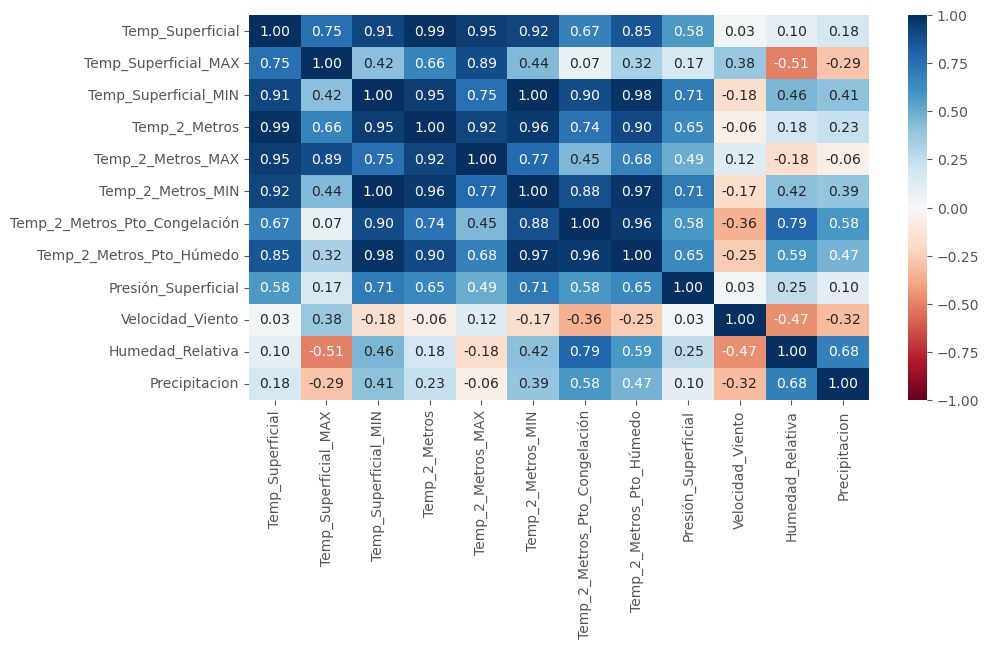

In [14]:
plt.figure(figsize = (10,5)) #cambiamos la variable quality_ord a int para calcular correlacion
corr_matrix = df_estatal[columnas_numericas].corr()
sns.heatmap(corr_matrix, annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

### Pairplot Regresión

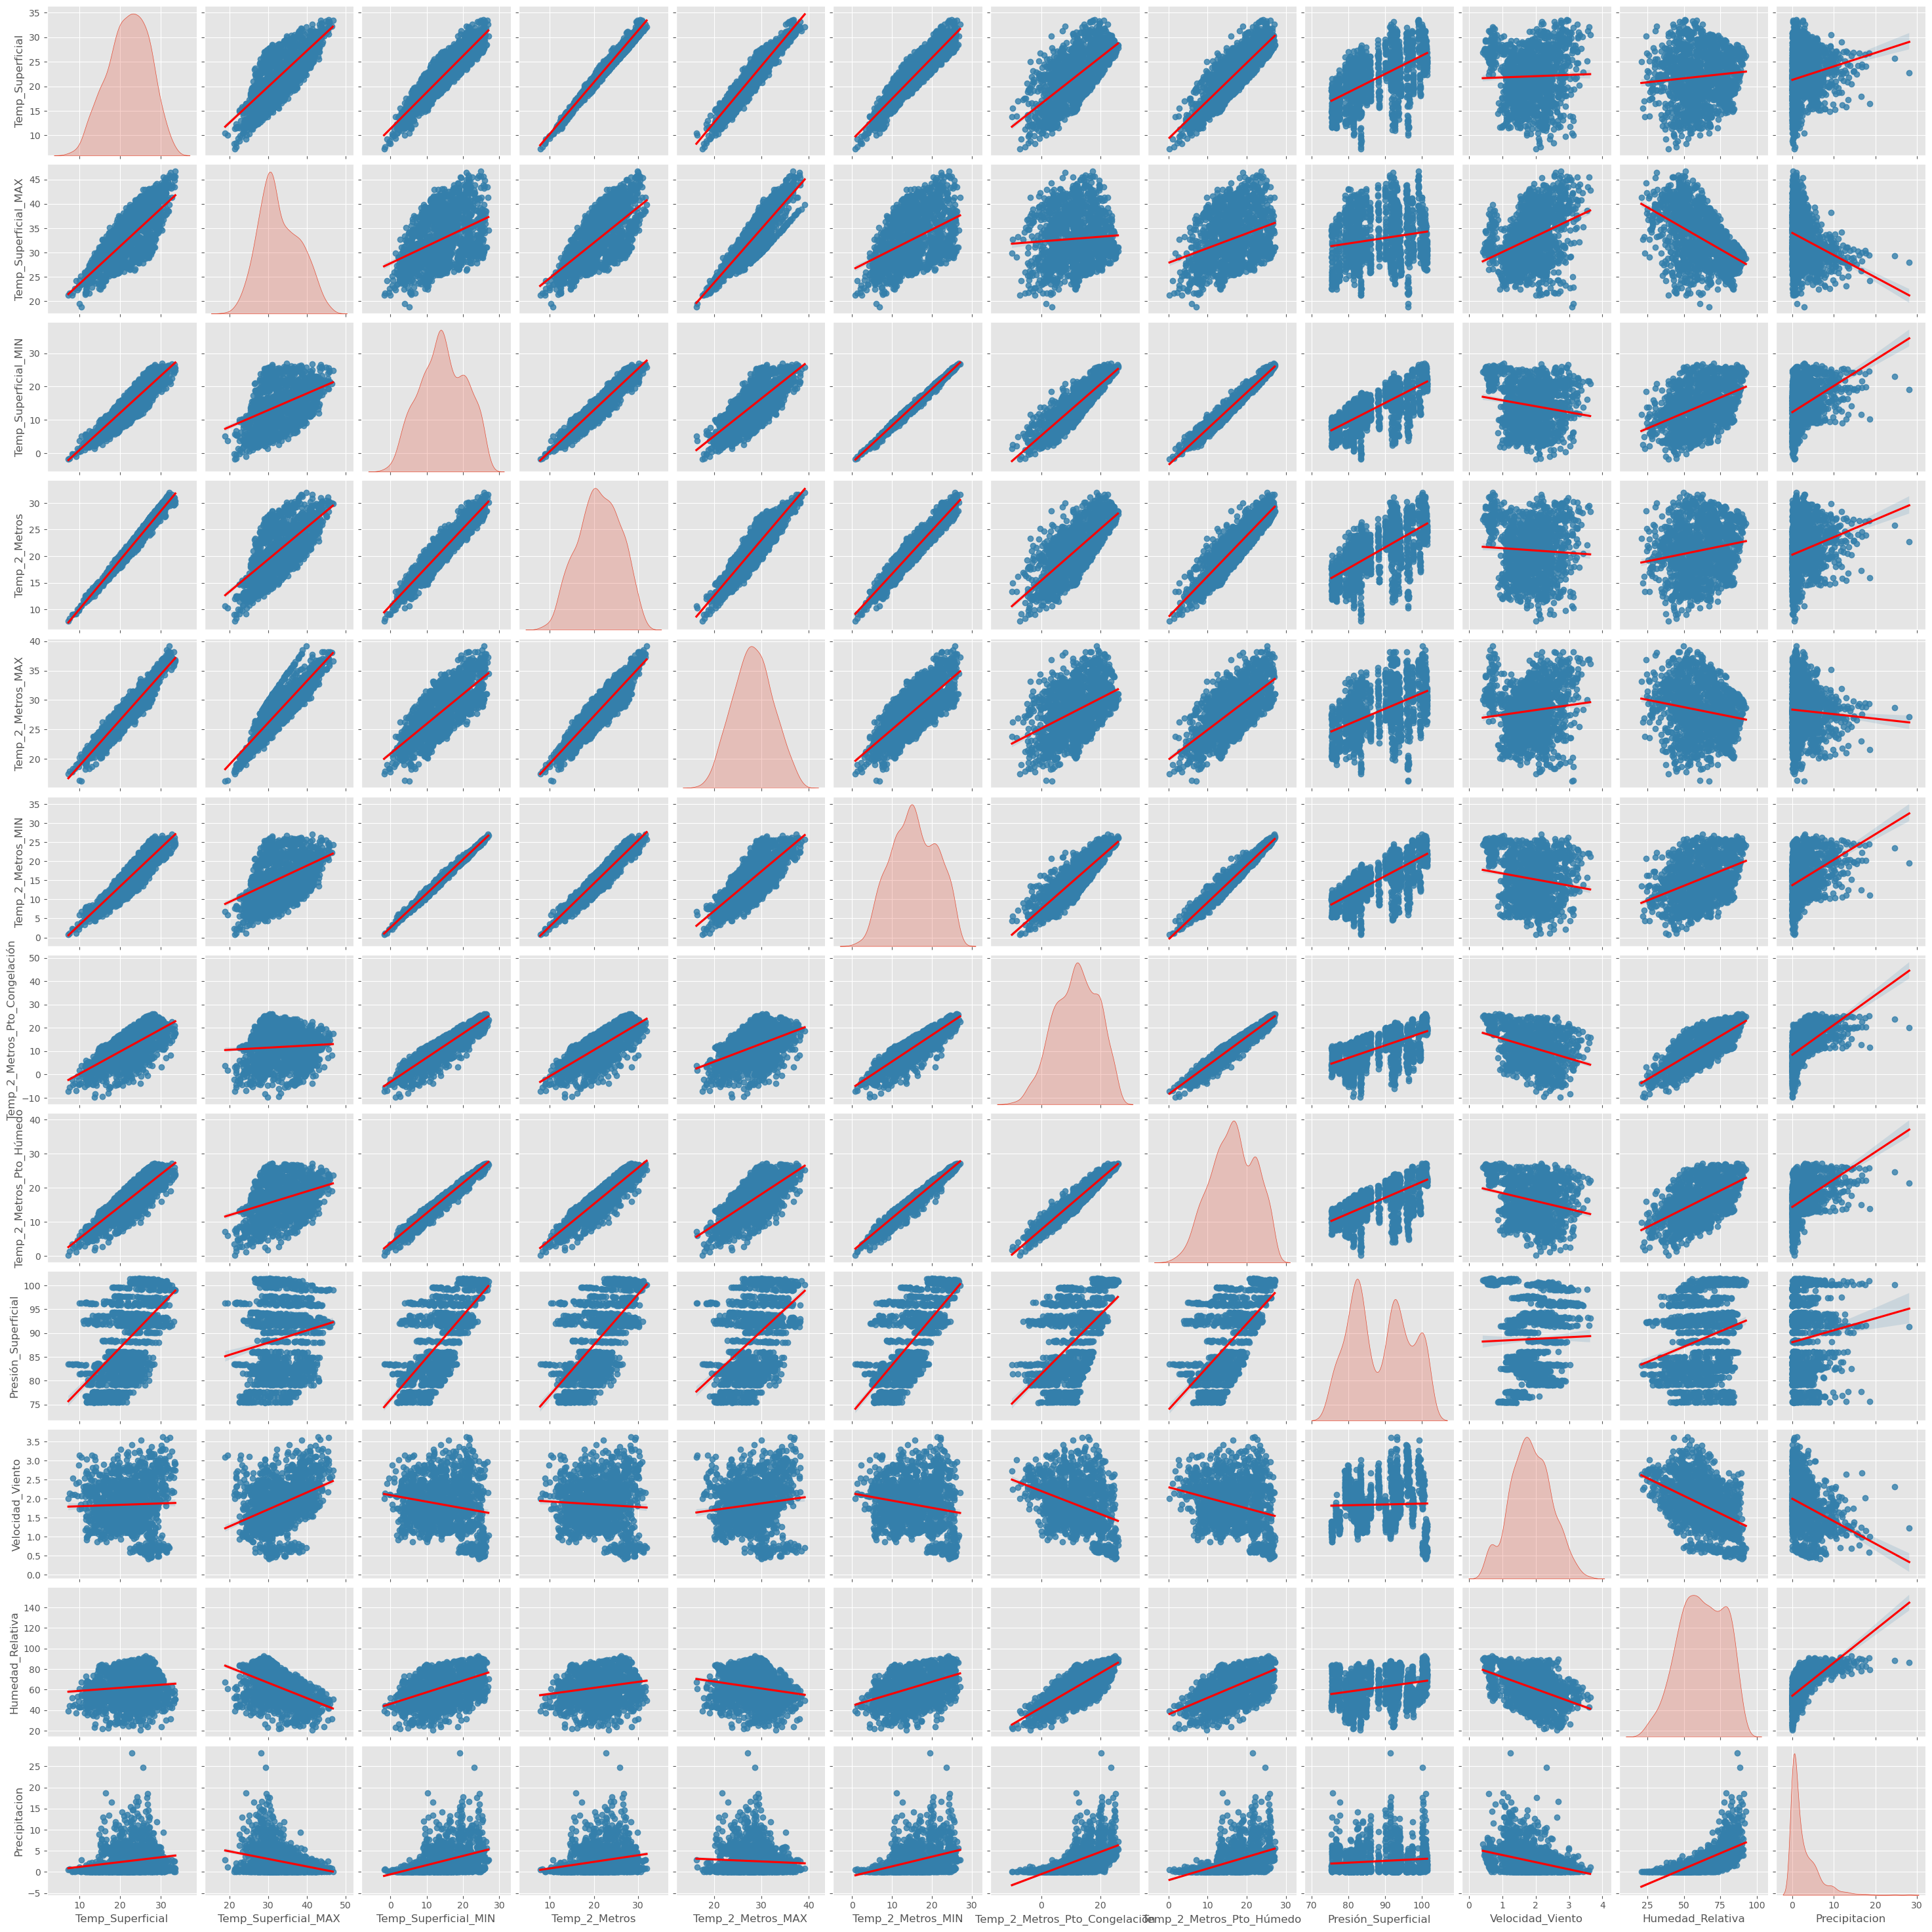

In [15]:
# Definir el color principal para el pairplot y la línea de regresión
color_main = '#347fab'  # Color principal para el pairplot
color_reg_line = 'red'  # Color para la línea de regresión

# Crear un pairplot con regresión para las columnas numéricas
pairplot = sns.pairplot(df_estatal[columnas_numericas], kind='reg', diag_kind='kde', plot_kws={'color': color_main})

# Ajustar el color de la línea de regresión en cada gráfico
for i in range(len(columnas_numericas)):
    for j in range(len(columnas_numericas)):
        if i != j:
            for line in pairplot.axes[i, j].lines:
                line.set_color(color_reg_line)

plt.show()

# Reduccion de Dimensionalidad
### PCA (Principal Component Analysis)

In [16]:
df_estatal_agrupado = df_estatal.groupby(['Estado']).mean().reset_index() # Agrupamos por Estado
df_estatal_agrupado[columnas_numericas].head() 

,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion
0,18.871889,32.845999,8.863397,17.604772,26.264502,10.182068,5.189048,11.397020,79.211368,2.213310,51.825100,1.272438
1,20.207315,31.924295,12.259976,19.240064,26.539898,13.605977,5.994946,12.617519,96.010601,2.737813,50.331640,0.631639
2,26.207271,38.210010,18.425430,24.008135,30.901137,18.581761,12.901657,18.454871,99.275135,2.779190,55.381700,0.547862
3,27.277320,32.568785,23.081371,27.156546,32.220278,22.996848,21.349126,24.252809,100.429036,0.705266,74.272313,3.846626
4,22.770345,29.843159,17.726692,22.501427,28.034464,18.269030,18.295264,20.398353,91.531549,1.272043,80.119392,6.876411


In [17]:
datos = df_estatal_agrupado[columnas_numericas].values

n_components = 4
pipe = Pipeline(
    [('scaler', StandardScaler()), 
     ('pca', PCA(n_components=n_components))]
)

pipe.fit(datos)

pca = pipe.get_params()['pca']

pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC {x}' for x in range(1,n_components+1)],
    index = df_estatal_agrupado[columnas_numericas].columns
)

,PC 1,PC 2,PC 3,PC 4
Temp_Superficial,0.335905,0.162501,-0.065584,-0.050713
Temp_Superficial_MAX,0.095819,0.532916,-0.056002,-0.650194
Temp_Superficial_MIN,0.348507,0.017120,-0.020218,0.135469
Temp_2_Metros,0.342387,0.108315,-0.104067,0.044579
Temp_2_Metros_MAX,0.304394,0.267105,-0.200357,-0.154388
Temp_2_Metros_MIN,0.347908,0.023496,-0.030816,0.138400
Temp_2_Metros_Pto_Congelación,0.331465,-0.167258,0.134036,-0.085064
Temp_2_Metros_Pto_Húmedo,0.347037,-0.066077,0.046256,-0.037680
Presión_Superficial,0.315237,0.173816,0.100423,0.559520
Velocidad_Viento,-0.091251,0.430636,0.850899,0.066156


In [18]:
# Nuevo código para obtener las 3 variables principales ordenadas para cada componente principal
for i in range(n_components):
    loadings = pca.components_[i]
    sorted_loading_indices = np.argsort(np.abs(loadings))[::-1]
    sorted_loadings = loadings[sorted_loading_indices]

    print(f"Variables principales por PCA{i+1}:")
    for j in sorted_loading_indices[:4]:  # Limita la salida a las primeras 3 variables
        print(f"{df_estatal_agrupado[columnas_numericas].columns[j]}: {loadings[j]}")
    print()

Variables principales por PCA1:
Temp_Superficial_MIN: 0.34850722615332475
Temp_2_Metros_MIN: 0.3479079474385603
Temp_2_Metros_Pto_Húmedo: 0.34703711928998265
Temp_2_Metros: 0.3423866872062442

Variables principales por PCA2:
Temp_Superficial_MAX: 0.5329160619153595
Precipitacion: -0.4424020878123135
Velocidad_Viento: 0.4306358297969767
Humedad_Relativa: -0.4024318090782474

Variables principales por PCA3:
Velocidad_Viento: 0.8508989130255064
Humedad_Relativa: 0.3513742100076011
Precipitacion: 0.2500961772290278
Temp_2_Metros_MAX: -0.20035732405960838

Variables principales por PCA4:
Temp_Superficial_MAX: -0.6501940978563168
Presión_Superficial: 0.5595201257619247
Precipitacion: -0.3958697669818019
Humedad_Relativa: -0.16893366006769978



In [19]:
loadings = pca.components_[0]
sorted_loading_indices = np.argsort(np.abs(loadings))[::-1]
sorted_loadings = loadings[sorted_loading_indices]

df_sorted_loadings = pd.DataFrame(
    sorted_loadings,
    index=df_estatal_agrupado[columnas_numericas].columns[sorted_loading_indices],
    columns=['PC1']
)

df_sorted_loadings

,PC1
Temp_Superficial_MIN,0.348507
Temp_2_Metros_MIN,0.347908
Temp_2_Metros_Pto_Húmedo,0.347037
Temp_2_Metros,0.342387
Temp_Superficial,0.335905
Temp_2_Metros_Pto_Congelación,0.331465
Presión_Superficial,0.315237
Temp_2_Metros_MAX,0.304394
Humedad_Relativa,0.227543
Precipitacion,0.189274


In [20]:
print("Varianza por componente: ", pca.explained_variance_)
print("Porcentaje de varianza explicada por componente: ", 
      pca.explained_variance_ratio_)

df_ev = pd.DataFrame({
    "Varianza explicada": np.cumsum(pca.explained_variance_ratio_),
    "Componente": [f'PC {x}' for x in range(1,n_components+1)]
})
fig = px.line(df_ev, x='Componente', y='Varianza explicada', markers=True,
              title="Varianza explicada por componente")

fig.update_layout(autosize=False, width=800, height=600)

fig.show()

Varianza por componente:  [8.42263917 2.91623761 0.57706768 0.28010737]
Porcentaje de varianza explicada por componente:  [0.67995264 0.23542543 0.04658619 0.02261283]


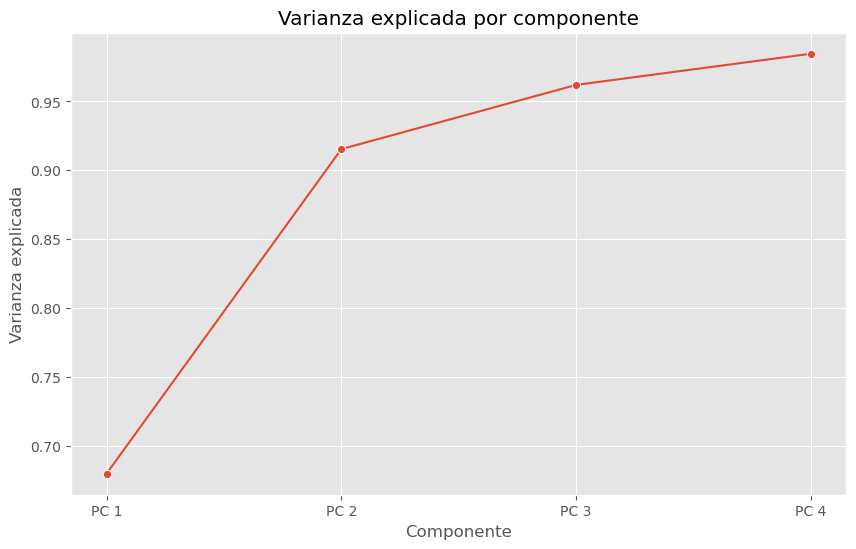

In [21]:
# Gráfico de línea utilizando Seaborn
plt.figure(figsize=(10, 6)) 

sns.lineplot(data=df_ev, x='Componente', y='Varianza explicada', marker='o')

plt.title('Varianza explicada por componente')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')

plt.show()

In [30]:
df = pd.DataFrame(
    pipe.transform(df_estatal_agrupado[columnas_numericas].values),
    columns= [f'PC {x}' for x in range(1,n_components+1)],
    index= df_estatal_agrupado.Estado    
)

fig = px.scatter(
    df, 
    x='PC 3', y='PC 2', color='PC 4',
    text=df.index,
    title="Componentes principales de datos climaticos para estados de México",
    color_continuous_scale=px.colors.diverging.RdBu[::-1],
    range_color=[-1, 1]
)

fig.update_traces(marker=dict(size=15),
                  textposition='middle right',
                  )
fig.update_layout(autosize=False, width=800, height=600)

fig.show()

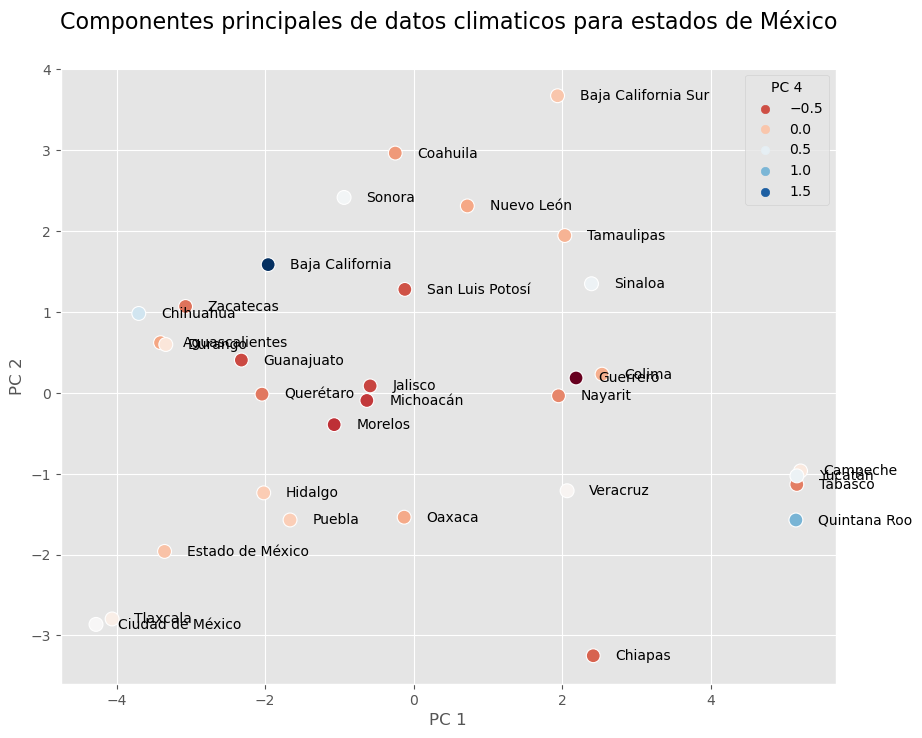

In [27]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC 1', y='PC 2', hue='PC 4', s=100,palette='RdBu')


for line in range(0, df.shape[0]):
     plt.text(df['PC 1'][line]+0.3, df['PC 2'][line]-0.05, df.index[line], 
              horizontalalignment='left', 
              size='medium', 
              color='black')  # Ajusta los valores sumados para cambiar la separación del texto

plt.title("Componentes principales de datos climaticos para estados de México", fontsize=16, y=1.05)
plt.show()